
 # DecisionTree



In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.style.use('C:/Users/Assem/Desktop/ML_lab/deeplearning.mplstyle')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

RANDOM_STATE = 55 

# 1.1 Datatset

In [142]:
df=pd.read_csv('C:\\Users\\Assem\\Desktop\\heart.csv')


In [143]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


 ## 1.2 Data preprocessing

In [144]:
df.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [145]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [146]:
df.shape

(918, 12)

In [147]:
#  missing values
missing_values = df.isnull().sum().any()

if missing_values:
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [148]:
df_shuffled = df.sample(frac=1, random_state=42)
train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=42)
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (734, 12)
Testing set shape: (184, 12)


C:\Users\Assem\AppData\Local\Temp\ipykernel_3392\928689897.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df["HeartDisease"].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',


<Axes: title={'center': 'Pie Chart for Heart Disease'}, ylabel='count'>

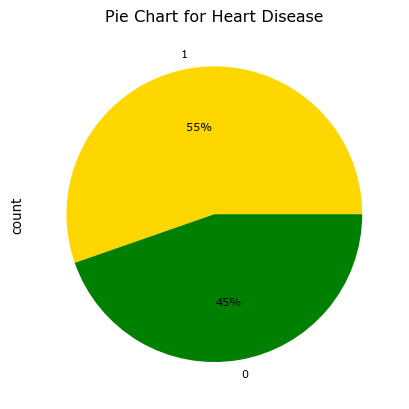

In [149]:
colors = ['#FFD700', 'green']
df["HeartDisease"].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',
                              autopct='%.0f%%', colormap='nipy_spectral_r' , colors=colors)

C:\Users\Assem\AppData\Local\Temp\ipykernel_3392\2189238300.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df['ST_Slope'].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',


<Axes: title={'center': 'Pie Chart for Heart Disease'}, ylabel='count'>

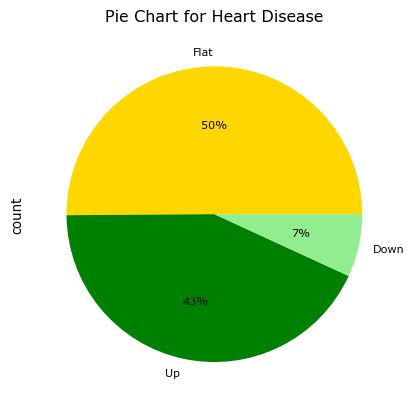

In [150]:
colors = ['#FFD700', 'green', '#90EE90']
df['ST_Slope'].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',
                              autopct='%.0f%%', colormap='nipy_spectral_r',colors=colors)

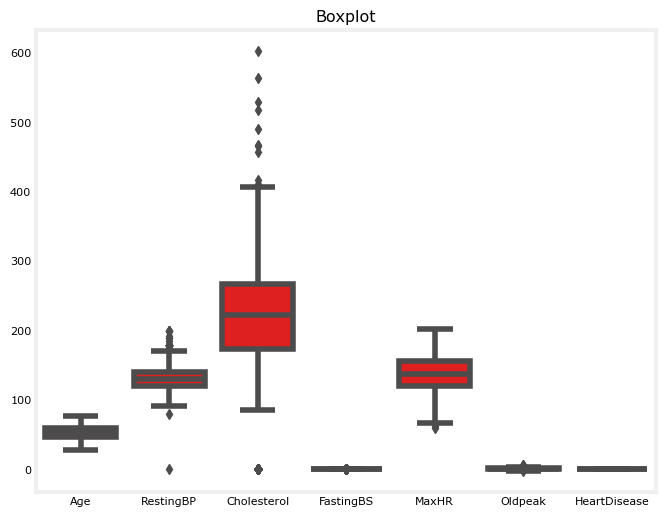

In [151]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, color='red')
plt.title('Boxplot')
plt.show()

C:\Users\Assem\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


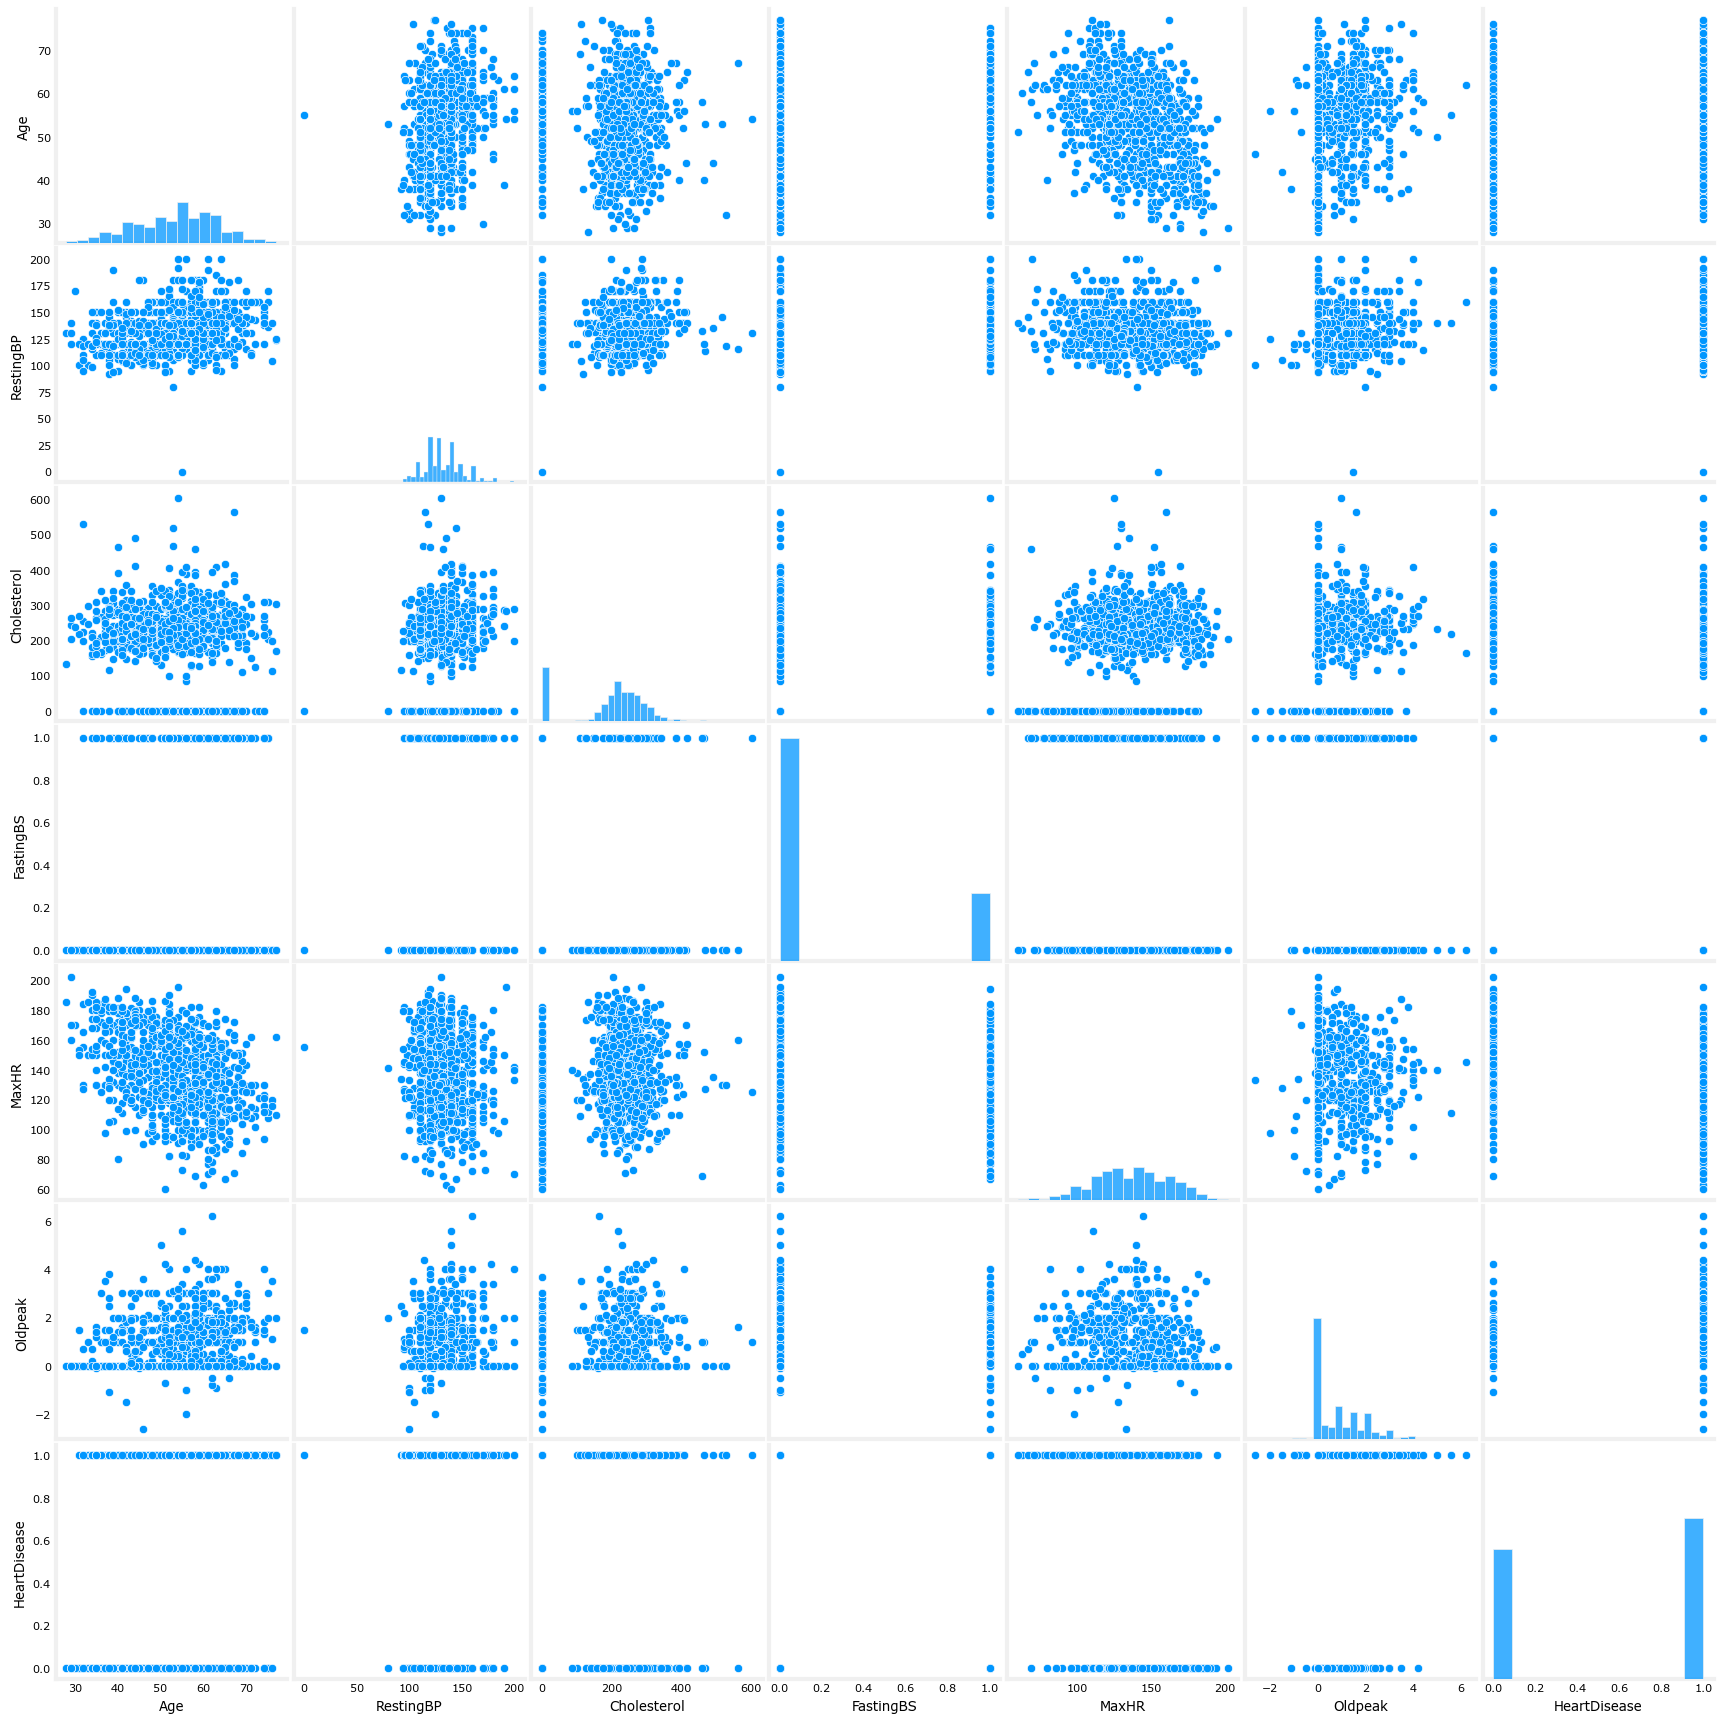

In [152]:
sns.pairplot(df)
plt.show()

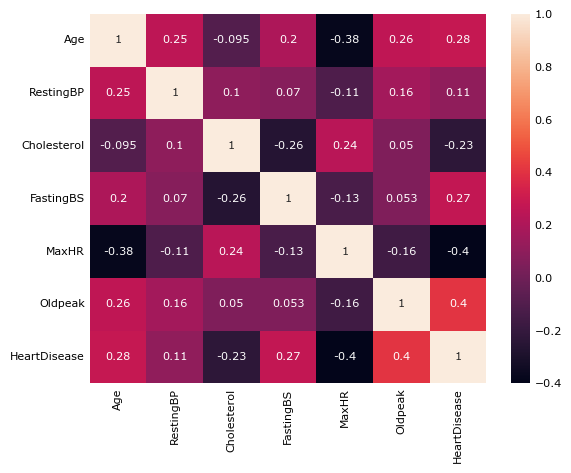

In [153]:
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

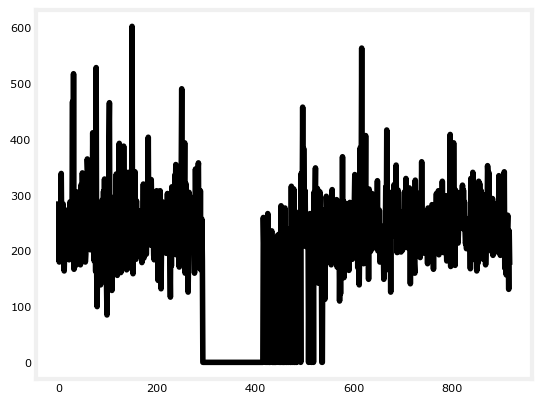

In [154]:
laste = df['Cholesterol'].plot(color='black')  
plt.show(laste)

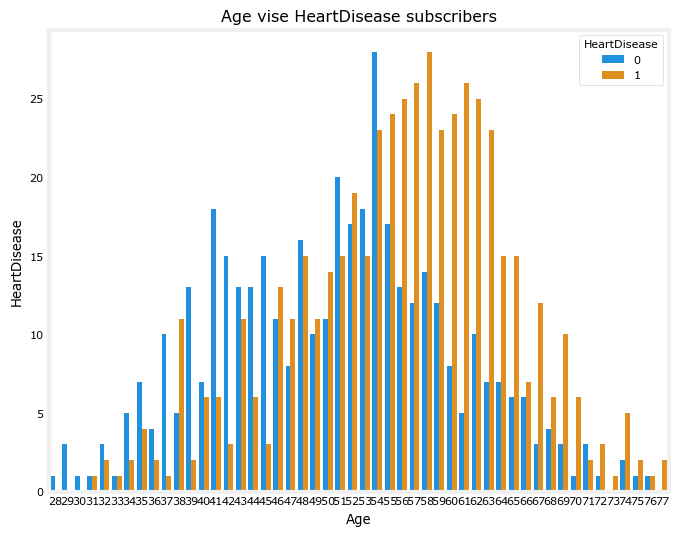

In [155]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Age', hue='HeartDisease')
plt.xlabel('Age')
plt.ylabel('HeartDisease')
plt.title('Age vise HeartDisease subscribers')
plt.show()

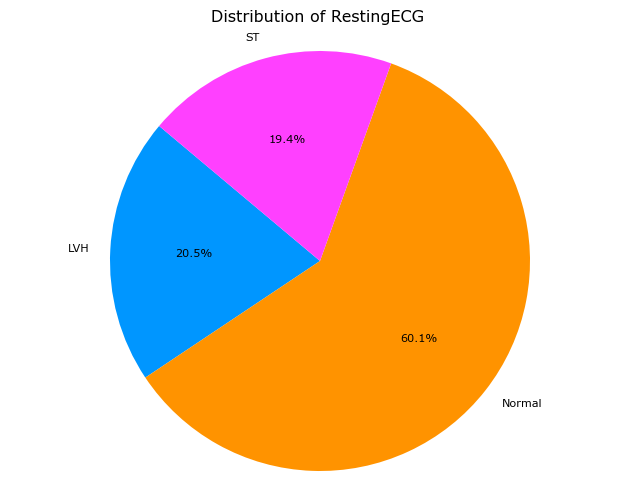

In [156]:
RestingECG = df.groupby('RestingECG').size()
plt.figure(figsize=(8,6))
plt.pie(RestingECG ,labels=RestingECG.index,autopct='%1.1f%%' , startangle=140)
plt.title('Distribution of RestingECG ')
plt.axis('equal')
plt.show()

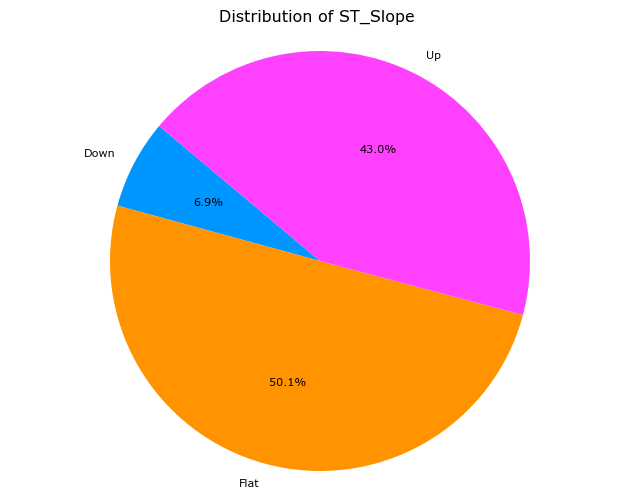

In [157]:
ST_Slope = df.groupby('ST_Slope').size()
plt.figure(figsize=(8,6))
plt.pie(ST_Slope ,labels=ST_Slope.index,autopct='%1.1f%%' , startangle=140)
plt.title('Distribution of ST_Slope ')
plt.axis('equal')
plt.show()

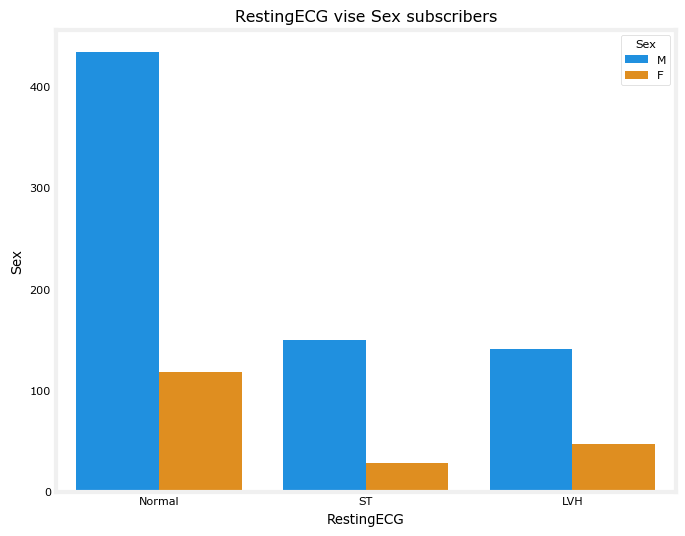

In [158]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='RestingECG', hue='Sex')
plt.xlabel('RestingECG')
plt.ylabel('Sex')
plt.title('RestingECG vise Sex subscribers')
plt.show()

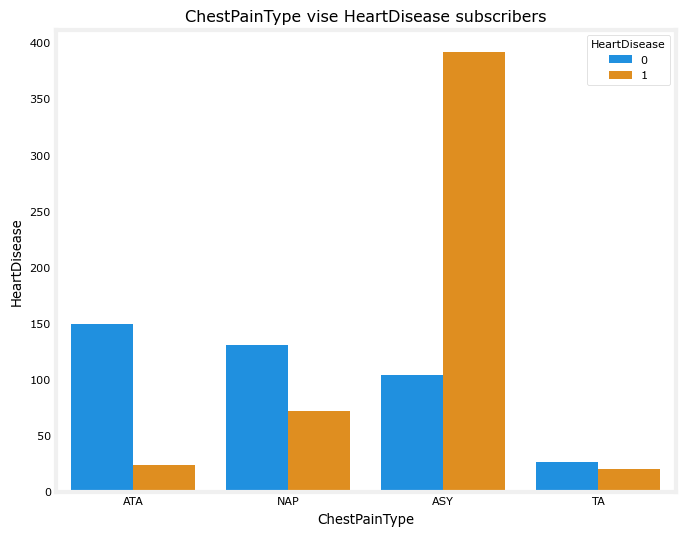

In [159]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='ChestPainType', hue='HeartDisease')
plt.xlabel('ChestPainType')
plt.ylabel('HeartDisease')
plt.title('ChestPainType vise HeartDisease subscribers')
plt.show()

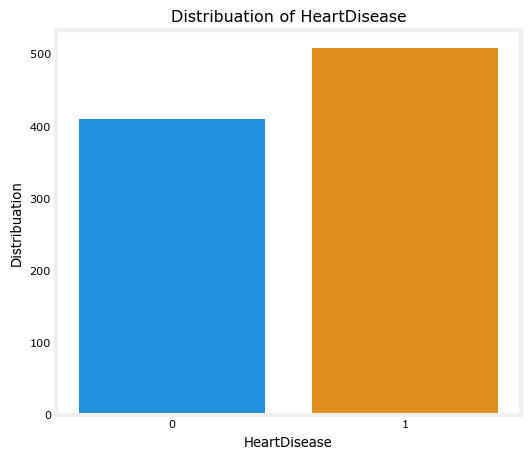

In [160]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Distribuation')
plt.title('Distribuation of HeartDisease')
plt.show()

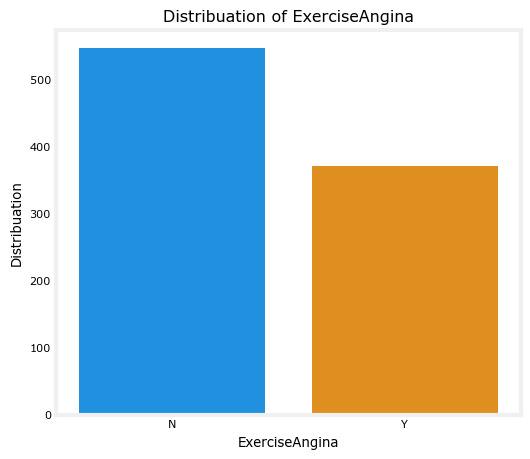

In [161]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='ExerciseAngina')
plt.xlabel('ExerciseAngina')
plt.ylabel('Distribuation')
plt.title('Distribuation of ExerciseAngina')
plt.show()

# 2. One-hot encoding using Pandas

In [162]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [163]:
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)

In [164]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [165]:
features = [x for x in df.columns if x not in 'HeartDisease'] 

In [166]:
print(len(features))

20


# 3. Splitting the Dataset


In [167]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)


In [168]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


 # 4. Building the Models

 # 4.1 Decision Tree

In [169]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 

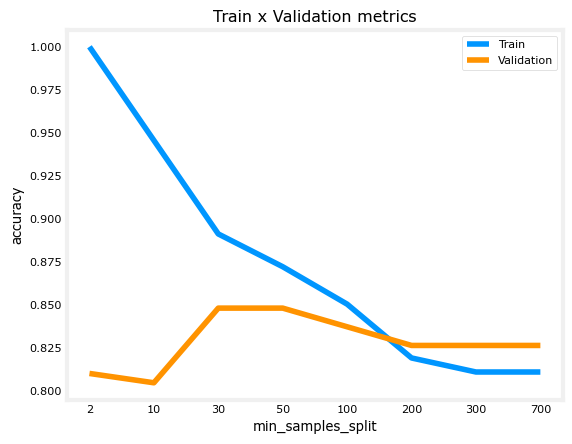

In [170]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:

    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

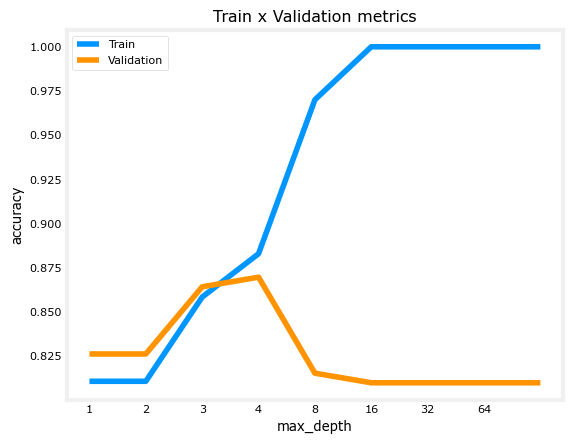

In [171]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
 
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [172]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [173]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics validation:
	Accuracy score: 0.8641


 # 4.2 Random Forest

In [174]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

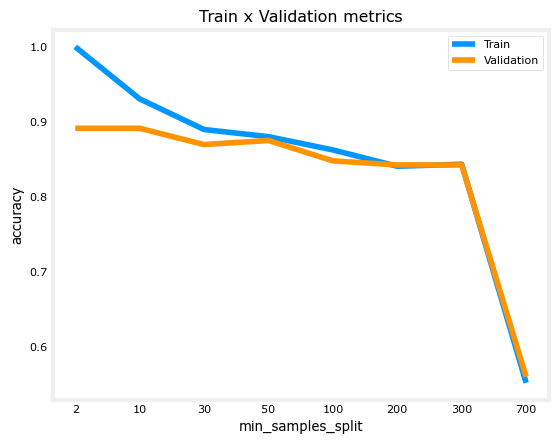

In [175]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

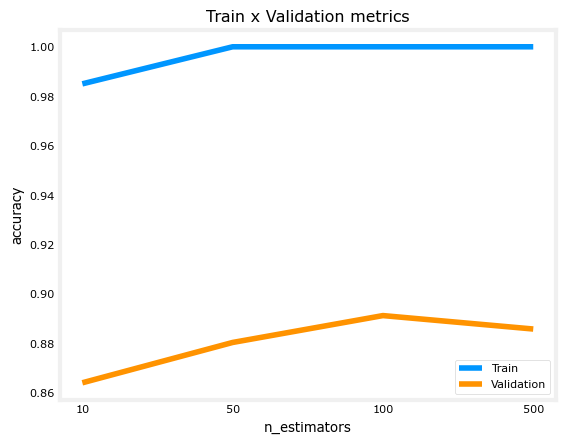

In [176]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [177]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [178]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9332
Metrics test:
	Accuracy score: 0.8804


 # 4.3 XGBoost


In [179]:
n = int(len(X_train)*0.8) 

In [180]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [181]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554
[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000
[11]	validation_0-logloss:0.45621
[12]	validation_0-logloss:0.45483
[13]	validation_0-logloss:0.44975
[14]	validation_0-logloss:0.44495
[15]	validation_0-logloss:0.44073
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43936
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44322
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419


C:\Users\Assem\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [182]:
xgb_model.best_iteration

17

In [183]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8533


# 1.first experiment
Split the dataset into training and testing sets
1. Initialize empty lists to store tree sizes and accuracies
2. Repeat the experiment five times
3. Calculate the size of the decision tree
4. Make predictions on the testing set
5. Append the size and accuracy to the respective lists
6.Find the index of the model with the highest overall performance


In [184]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['HeartDisease'], train_size=0.8, random_state=RANDOM_STATE)
tree_sizes = []
tree_accuracies = []

for i in range(5):
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    tree_size = tree.tree_.node_count
    
    y_pred = tree.predict(X_test)
    tree_accuracy = accuracy_score(y_test, y_pred)
    tree_sizes.append(tree_size)
    tree_accuracies.append(tree_accuracy)

for i in range(5):
    print(f"Experiment {i+1}: Size={tree_sizes[i]}, Accuracy={tree_accuracies[i]}")

best_model_index = tree_accuracies.index(max(tree_accuracies))

print(f"\nBest Model: Size={tree_sizes[best_model_index]}, Accuracy={tree_accuracies[best_model_index]}")


Experiment 1: Size=203, Accuracy=0.7989130434782609
Experiment 2: Size=203, Accuracy=0.8260869565217391
Experiment 3: Size=201, Accuracy=0.8152173913043478
Experiment 4: Size=203, Accuracy=0.7880434782608695
Experiment 5: Size=203, Accuracy=0.8315217391304348

Best Model: Size=203, Accuracy=0.8315217391304348


 # 2. Second experiment:
    Training and Testing with a Range of Train-Test Split Ratios: Consider training set sizes in the range of 30% to 70% (increments of 10%). Start with a training set size of 30% and increase it by 10% until you reach 70%. For each training set size:
    • Run the experiment with five different random seeds. 
    • Calculate the mean, maximum, and minimum accuracy at each training set size. 
     • Measure the mean, maximum, and minimum tree size. 
     • Store the statistics in a report.
     • Create two plots: one showing accuracy against training set size and another showing the number of nodes in the final            tree against training set size.

In [185]:
train_sizes = np.arange(0.3, 0.8, 0.1)

accuracy_mean = []
accuracy_max = []
accuracy_min = []
tree_size_mean = []
tree_size_max = []
tree_size_min = []

for train_size in train_sizes:
    
    accuracies = []
    tree_sizes = []

    for seed in range(5):
        X_train, X_test, y_train, y_test = train_test_split(df[features], df['HeartDisease'],
                                                            train_size=train_size, random_state=seed)
        
        tree = DecisionTreeClassifier()
        tree.fit(X_train, y_train)
        
        tree_size = tree.tree_.node_count
        
        y_pred = tree.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
    
        accuracies.append(accuracy)
        tree_sizes.append(tree_size)

    accuracy_mean.append(np.mean(accuracies))
    accuracy_max.append(np.max(accuracies))
    accuracy_min.append(np.min(accuracies))
    

    tree_size_mean.append(np.mean(tree_sizes))
    tree_size_max.append(np.max(tree_sizes))
    tree_size_min.append(np.min(tree_sizes))


report_data = {
    'Train Size': train_sizes,
    'Accuracy Mean': accuracy_mean,
    'Accuracy Max': accuracy_max,
    'Accuracy Min': accuracy_min,
    'Tree Size Mean': tree_size_mean,
    'Tree Size Max': tree_size_max,
    'Tree Size Min': tree_size_min
}
report = pd.DataFrame(report_data)

print(report)



   Train Size  Accuracy Mean  Accuracy Max  Accuracy Min  Tree Size Mean  \
0         0.3       0.767963      0.791602      0.740280            87.4   
1         0.4       0.786207      0.816697      0.756806           116.2   
2         0.5       0.777778      0.790850      0.769063           144.2   
3         0.6       0.790761      0.809783      0.766304           165.8   
4         0.7       0.792754      0.833333      0.750000           197.8   

   Tree Size Max  Tree Size Min  
0             91             83  
1            123            103  
2            159            137  
3            187            153  
4            203            193  


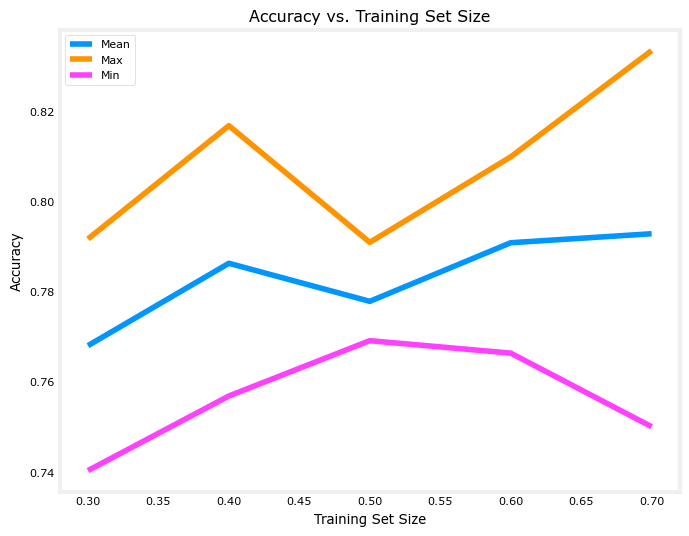

In [186]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, accuracy_mean, label='Mean')
plt.plot(train_sizes, accuracy_max, label='Max')
plt.plot(train_sizes, accuracy_min, label='Min')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Set Size')
plt.legend()
plt.show()

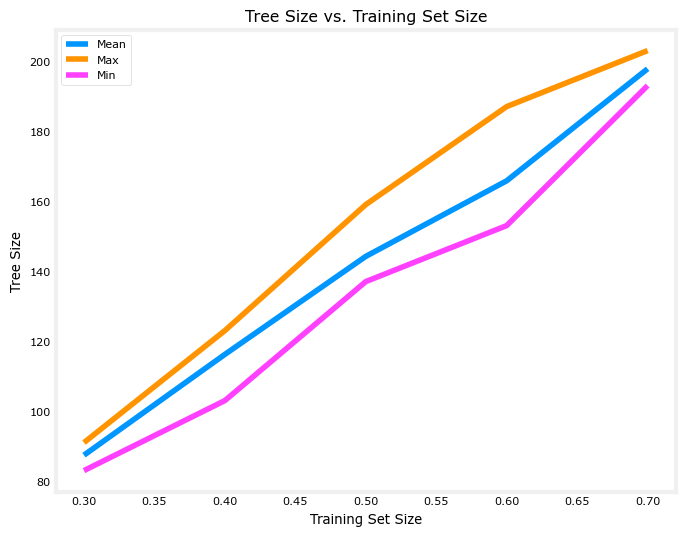

In [187]:
# Create the second plot: tree size against training set size
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, tree_size_mean, label='Mean')
plt.plot(train_sizes, tree_size_max, label='Max')
plt.plot(train_sizes, tree_size_min, label='Min')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.title('Tree Size vs. Training Set Size')
plt.legend()
plt.show()

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
   
    if current_depth == max_depth:
        formatting = " " * current_depth + "-" * current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return


    best_feature = get_best_split(X, y, node_indices)

    formatting = "-" * current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))

    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth + 1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth + 1)

               #  the feature matrix and target variable, respectively, for the heart disease dataset
X = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 1],
              [67, 1, 4, 160, 286, 0, 0, 108, 1, 1.5, 1, 0],
              [67, 1, 4, 120, 229, 0, 1, 129, 1, 2.6, 1, 3],
              [37, 1, 3, 130, 250, 0, 0, 187, 0, 3.5, 0, 0],
              [41, 0, 2, 130, 204, 0, 0, 172, 0, 1.4, 2, 0],
              [56, 1, 2, 120, 236, 0, 1, 178, 0, 0.8, 2, 0]])
y = np.array([0, 1, 1, 0, 0, 1])

tree_classifier = DecisionTreeClassifier(max_depth=3)

cv_scores = cross_val_score(tree_classifier, X, y, cv=3)
average_accuracy = np.mean(cv_scores)

print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.3333333333333333
